In [1]:
import scipy.misc
import random

train_batch_pointer=0

validation_batch_pointer=0

from itertools import islice

images=[]

angles=[]

from scipy import pi

txt=open("driving_dataset/driving_dataset/data.txt")
num_lines=sum(1 for line in open("driving_dataset/driving_dataset/data.txt"))
lines_slice=islice(txt,num_lines)

for line in lines_slice:
	image,angle=line.strip().split()
	images.append("driving_dataset/driving_dataset/"+image)
	angle=float(angle)*scipy.pi/180
	angles.append(angle)

#time based split
split_ratio=0.8
split_up_to=int(num_lines*split_ratio)
print(split_up_to)
train_images=images[:split_up_to]
train_angles=angles[:split_up_to]

validation_images=images[split_up_to:]
validation_angles=angles[split_up_to:]

num_train_images=len(train_images)
num_validation_images=len(validation_images)
print(num_train_images,num_validation_images)

36324
36324 9082


In [2]:
train_images[0]

'driving_dataset/driving_dataset/0.jpg'

In [3]:
#img.imread(validation_images[(validation_batch_pointer+i)%num_validation_images])/255



In [4]:
train_angles[22]

0.0

In [5]:
train_ang=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,36324):
    train_ang.append([train_angles[i]])
    
print("time took:",dt.datetime.now()-start)

time took: 0:00:00.009978


In [6]:
val_im=[]

import datetime  as dt
start=dt.datetime.now()
for i in range(0,9082):
    val_im.append(scipy.misc.imresize(scipy.misc.imread(validation_images[ i ])[-150:], [66, 200]) / 255.0)
print("time took:",dt.datetime.now()-start)

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


time took: 0:00:27.686168


In [7]:
val_ang=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,9082):
    val_ang.append([validation_angles[i]])
    
print("time took:",dt.datetime.now()-start)

time took: 0:00:00.001964


In [8]:
val_ang[0]

[-0.19355701404617112]

In [9]:
len(val_ang)

9082

In [10]:
train_im=[]
import datetime  as dt
start=dt.datetime.now()
for i in range(0,36324):
    train_im.append(scipy.misc.imresize(scipy.misc.imread(train_images[ i ])[-150:], [66, 200]) / 255.0)
    
print("time took:",dt.datetime.now()-start)

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


time took: 0:01:55.525095


In [11]:
train_im[0].shape
import numpy as np
train_im=np.array(train_im)
val_im=np.array(val_im)
val_ang=np.array(val_ang)
train_ang=np.array(train_ang)

In [12]:
from keras.models import Sequential 
from keras.layers import Dense,Flatten,Dropout,Conv2D
from keras import backend as k
from keras.initializers import TruncatedNormal,Constant


Using TensorFlow backend.


In [13]:
model=Sequential()
model.add(Conv2D(24,5,strides=(2,2),activation="relu",input_shape=(66,200,3),padding="valid"))
model.add(Conv2D(36,5,strides=(2,2),activation="relu",padding="valid"))
model.add(Conv2D(48,5,strides=(2,2),activation="relu",padding="valid"))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid"))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid"))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)  

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
start=dt.datetime.now()
import time
import keras
class delay(keras.callbacks.Callback):
    def __int__(self,delay_time=600):
        sel.delay_time = 600
        
    def on_epoch_begin(self,epoch,logs={}):
        if(epoch+1)%10==0:
            print("cooling down to decrease CPU tempereture")
            time.sleep(300)#600 sec
results=model.fit(train_im,train_ang,epochs=100,batch_size=512,validation_data=(val_im,val_ang),verbose=1,callbacks=[delay()])
print("time took",dt.datetime.now()-start)

Train on 36324 samples, validate on 9082 samples
Epoch 1/100
36324/36324 [==============================] - 32s 892us/step - loss: 0.2951 - val_loss: 0.2295
Epoch 2/100
36324/36324 [==============================] - 26s 722us/step - loss: 0.2510 - val_loss: 0.2079
Epoch 3/100
36324/36324 [==============================] - 28s 767us/step - loss: 0.1769 - val_loss: 0.4343
Epoch 4/100
36324/36324 [==============================] - 28s 757us/step - loss: 0.1356 - val_loss: 0.1520
Epoch 5/100
36324/36324 [==============================] - 27s 744us/step - loss: 0.1135 - val_loss: 0.2057
Epoch 6/100
36324/36324 [==============================] - 26s 727us/step - loss: 0.0833 - val_loss: 0.2036
Epoch 7/100
36324/36324 [==============================] - 29s 788us/step - loss: 0.0683 - val_loss: 0.2298
Epoch 8/100
36324/36324 [==============================] - 28s 763us/step - loss: 0.0610 - val_loss: 0.2677
Epoch 9/100
36324/36324 [==============================] - 29s 789us/step - loss: 0.059

In [26]:
scores = model.evaluate(val_im, val_ang, verbose=1)
print("loss on validation data:::" , (scores))

scores = model.evaluate(train_im, train_ang, verbose=1)
print("loss on validation data:::" , (scores))

9082/9082 [==============================] - 9s 1ms/step
loss on validation data::: 0.34523915233955316
36324/36324 [==============================] - 53s 1ms/step
loss on validation data::: 0.007264948925692722


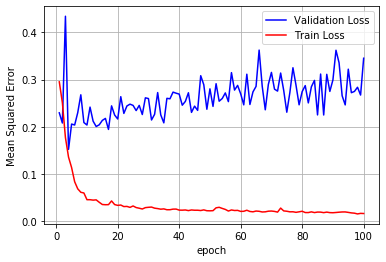

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Mean Squared Error')
x = list(range(1,100+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

In [32]:
import cv2
img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0

i = 0
from subprocess import call


In [33]:
while(cv2.waitKey(10) != ord('q')):
    full_image = scipy.misc.imread("driving_dataset/driving_dataset/" + str(i) + ".jpg", mode="RGB")
    image = scipy.misc.imresize(full_image[-150:], [66, 200]) / 255.0
    degrees = model.predict(image[None,...])[0][0] * 180.0 / scipy.pi
    #call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow("frame", cv2.cvtColor(full_image, cv2.COLOR_RGB2BGR))
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


Predicted steering angle: 1.8670648664649545 degrees
Predicted steering angle: 1.0577158377921816 degrees
Predicted steering angle: 0.9411339001701726 degrees
Predicted steering angle: 1.0170230648211265 degrees
Predicted steering angle: 1.1447499501778922 degrees
Predicted steering angle: 1.146368811732891 degrees
Predicted steering angle: 1.188818544146226 degrees
Predicted steering angle: 1.2477171863499499 degrees
Predicted steering angle: 1.3567758840446014 degrees
Predicted steering angle: 1.351288894263554 degrees
Predicted steering angle: 1.3400467230548303 degrees
Predicted steering angle: 1.5572782215644412 degrees
Predicted steering angle: 1.6437793657514794 degrees
Predicted steering angle: 1.4749367693036468 degrees
Predicted steering angle: 1.47563643680675 degrees
Predicted steering angle: 1.5930135578585365 degrees
Predicted steering angle: 1.474198895429874 degrees
Predicted steering angle: 1.7424166888765722 degrees
Predicted steering angle: 2.026093228127419 degrees


In [34]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation
from keras.layers.convolutional import Convolution2D,Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers import Cropping2D
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization
from keras import initializers

In [35]:
init = initializers.TruncatedNormal(stddev=0.1)
inti_bias = initializers.Constant(value=0.1)
activation = 'relu'
keep_prob = 0.5
keep_prob_dense = 0.7
        
model = Sequential()
        
        
        
        # Convnet

model.add(Convolution2D(24,5,5, subsample=(2,2),input_shape=(66,200,3), border_mode='valid', use_bias=True,bias_initializer=inti_bias,kernel_initializer=init))
model.add(Activation(activation))

        
model.add(Convolution2D(36,5,5, subsample=(2,2), border_mode='valid', init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Activation(activation))

        
model.add(Convolution2D(48,5,5, subsample=(2,2), border_mode='valid', init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Activation(activation))

        
model.add(Convolution2D(64,3,3, init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Activation(activation))

        
model.add(Convolution2D(64,3,3, init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Activation(activation))

        
        # FC
model.add(Flatten())
model.add(Dense(100, init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(keep_prob_dense))
model.add(Dense(50, init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(keep_prob_dense))
model.add(Dense(10, init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(keep_prob_dense))
model.add(Dense(1, init=init, use_bias=True,bias_initializer=inti_bias))
        
        # model.summary
        

model.summary()

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini..., strides=(2, 2), padding="valid")`
  del sys.path[0]
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), use_bias=True, bias_initializer=<keras.ini..., strides=(2, 2), padding="valid", kernel_initializer=<keras.ini...)`
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), use_bias=True, bias_initializer=<keras.ini..., strides=(2, 2), padding="valid", kernel_initializer=<keras.ini...)`
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D`

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
activation_1 (Activation)    (None, 31, 98, 24)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 47, 36)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
activation_3 (Activation)    (None, 5, 22, 48)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 3, 20, 64)         27712     
__________

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini...)`
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini...)`


In [36]:
model.compile(loss='mse', optimizer='Adam')

In [16]:
start=dt.datetime.now()
results=model.fit(train_im,train_ang,epochs=100,batch_size=1024,validation_data=(val_im,val_ang),verbose=1)
print("time took",dt.datetime.now()-start)

Instructions for updating:
Use tf.cast instead.
Train on 36324 samples, validate on 9082 samples
Epoch 1/100
36324/36324 [==============================] - 67s 2ms/step - loss: 1.9424 - val_loss: 0.1963
Epoch 2/100
36324/36324 [==============================] - 34s 947us/step - loss: 0.3276 - val_loss: 0.1936
Epoch 3/100
36324/36324 [==============================] - 29s 810us/step - loss: 0.3235 - val_loss: 0.1907
Epoch 4/100
36324/36324 [==============================] - 27s 749us/step - loss: 0.3186 - val_loss: 0.1904
Epoch 5/100
36324/36324 [==============================] - 26s 719us/step - loss: 0.3156 - val_loss: 0.1879
Epoch 6/100
36324/36324 [==============================] - 26s 712us/step - loss: 0.3112 - val_loss: 0.1921
Epoch 7/100
36324/36324 [==============================] - 27s 736us/step - loss: 0.3077 - val_loss: 0.1880
Epoch 8/100
36324/36324 [==============================] - 29s 799us/step - loss: 0.3050 - val_loss: 0.1859
Epoch 9/100
36324/36324 [================

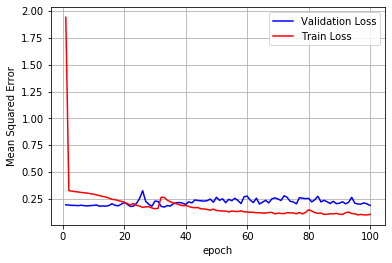

In [24]:
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Mean Squared Error')
x = list(range(1,100+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

In [32]:
init = initializers.TruncatedNormal(stddev=0.1)
inti_bias = initializers.Constant(value=0.1)
model=Sequential()
model.add(Conv2D(24,5,strides=(2,2),activation="relu",input_shape=(66,200,3),padding="valid", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Conv2D(36,5,strides=(2,2),activation="relu",padding="valid", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Conv2D(48,5,strides=(2,2),activation="relu",padding="valid", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Conv2D(64,3,strides=(1,1),activation="relu",padding="valid", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(0.3))
model.add(Dense(50,activation="relu", init=init, use_bias=True,bias_initializer=inti_bias))
model.add(Dropout(0.3))
model.add(Dense(1, init=init, use_bias=True,bias_initializer=inti_bias))
model.summary()

C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, 5, strides=(2, 2), activation="relu", input_shape=(66, 200, ..., padding="valid", use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini...)`
  after removing the cwd from sys.path.
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, 5, strides=(2, 2), activation="relu", padding="valid", use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini...)`
  """
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, 5, strides=(2, 2), activation="relu", padding="valid", use_bias=True, bias_initializer=<keras.ini..., kernel_initializer=<keras.ini...)`
  
C:\Users\saireddyavs\Anaconda3\envs\gpuu\lib\sit

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 1152)              0         
__________

In [33]:
model.compile(loss='mse', optimizer='Adam')

In [34]:
start=dt.datetime.now()
results=model.fit(train_im,train_ang,epochs=100,batch_size=1024,validation_data=(val_im,val_ang),verbose=1)
print("time took",dt.datetime.now()-start)

Train on 36324 samples, validate on 9082 samples
Epoch 1/100
36324/36324 [==============================] - 38s 1ms/step - loss: 0.3277 - val_loss: 0.1900
Epoch 2/100
36324/36324 [==============================] - 30s 830us/step - loss: 0.3157 - val_loss: 0.1920
Epoch 3/100
36324/36324 [==============================] - 30s 822us/step - loss: 0.2978 - val_loss: 0.2080
Epoch 4/100
36324/36324 [==============================] - 30s 837us/step - loss: 0.2728 - val_loss: 0.2401
Epoch 5/100
36324/36324 [==============================] - 27s 751us/step - loss: 0.2348 - val_loss: 0.2382
Epoch 6/100
36324/36324 [==============================] - 28s 767us/step - loss: 0.1921 - val_loss: 0.2513
Epoch 7/100
36324/36324 [==============================] - 28s 771us/step - loss: 0.1539 - val_loss: 0.1780
Epoch 8/100
36324/36324 [==============================] - 27s 751us/step - loss: 0.1431 - val_loss: 0.2248
Epoch 9/100
36324/36324 [==============================] - 27s 745us/step - loss: 0.1191 

Epoch 76/100
36324/36324 [==============================] - 28s 771us/step - loss: 0.0274 - val_loss: 0.2851
Epoch 77/100
36324/36324 [==============================] - 28s 769us/step - loss: 0.0258 - val_loss: 0.2509
Epoch 78/100
36324/36324 [==============================] - 26s 722us/step - loss: 0.0254 - val_loss: 0.2502
Epoch 79/100
36324/36324 [==============================] - 29s 789us/step - loss: 0.0271 - val_loss: 0.2495
Epoch 80/100
36324/36324 [==============================] - 27s 739us/step - loss: 0.0267 - val_loss: 0.2626
Epoch 81/100
36324/36324 [==============================] - 27s 735us/step - loss: 0.0273 - val_loss: 0.2586
Epoch 82/100
36324/36324 [==============================] - 27s 734us/step - loss: 0.0276 - val_loss: 0.2644
Epoch 83/100
36324/36324 [==============================] - 27s 741us/step - loss: 0.0303 - val_loss: 0.2257
Epoch 84/100
36324/36324 [==============================] - 28s 760us/step - loss: 0.0262 - val_loss: 0.2788
Epoch 85/100
36324/

In [39]:
scores = model.evaluate(val_im, val_ang, verbose=1)
print("loss: %.2f%%" % (scores))

9082/9082 [==============================] - 4s 426us/step
loss: 0.23%


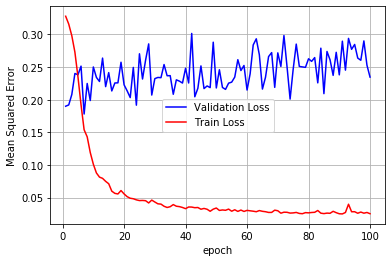

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Mean Squared Error')
x = list(range(1,100+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)

![model](https://camo.githubusercontent.com/ed884612d661a088f95e789a5e1e5f16b1ad6da9/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f3830302f312a4e625256354b74755a7774507935306f6e55655f4c512e706e67)

In [13]:
model = Sequential()

model.add(Conv2D(24, (5,5), strides=(2,2), activation="relu",input_shape = (66,200,3) ))
model.add(Conv2D(36, (5,5), strides=(2,2), activation="relu" ))
model.add(Conv2D(48, (5,5), strides=(2,2), activation="relu" ))
model.add(Conv2D(64, (3,3), strides=(2,2), activation="relu" ))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 10, 64)         27712     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)  

In [15]:
start=dt.datetime.now()
import time
import keras
class delay(keras.callbacks.Callback):
    def __int__(self,delay_time=600):
        sel.delay_time = 600
        
    def on_epoch_begin(self,epoch,logs={}):
        if(epoch+1)%10==0:
            print("cooling down to decrease CPU tempereture")
            time.sleep(300)#600 sec
model.compile(loss='mse', optimizer='Adam')
results=model.fit(train_im,train_ang,epochs=100,batch_size=512,validation_data=(val_im,val_ang),verbose=1,callbacks=[delay()])
print("time took",dt.datetime.now()-start)

Instructions for updating:
Use tf.cast instead.
Train on 36324 samples, validate on 9082 samples
Epoch 1/100
36324/36324 [==============================] - 43s 1ms/step - loss: 0.2975 - val_loss: 0.2111
Epoch 2/100
36324/36324 [==============================] - 33s 913us/step - loss: 0.2463 - val_loss: 0.2888
Epoch 3/100
36324/36324 [==============================] - 30s 827us/step - loss: 0.2003 - val_loss: 0.2621
Epoch 4/100
36324/36324 [==============================] - 28s 758us/step - loss: 0.1645 - val_loss: 0.3016
Epoch 5/100
36324/36324 [==============================] - 28s 769us/step - loss: 0.1309 - val_loss: 0.3481
Epoch 6/100
36324/36324 [==============================] - 27s 757us/step - loss: 0.1155 - val_loss: 0.3258
Epoch 7/100
36324/36324 [==============================] - 27s 735us/step - loss: 0.0969 - val_loss: 0.2972
Epoch 8/100
36324/36324 [==============================] - 24s 651us/step - loss: 0.0741 - val_loss: 0.1969
Epoch 9/100
36324/36324 [================

Epoch 71/100
36324/36324 [==============================] - 35s 966us/step - loss: 0.0196 - val_loss: 0.2133
Epoch 72/100
36324/36324 [==============================] - 27s 736us/step - loss: 0.0187 - val_loss: 0.2035
Epoch 73/100
36324/36324 [==============================] - 26s 726us/step - loss: 0.0186 - val_loss: 0.1853
Epoch 74/100
36324/36324 [==============================] - 26s 721us/step - loss: 0.0180 - val_loss: 0.1953
Epoch 75/100
36324/36324 [==============================] - 25s 699us/step - loss: 0.0197 - val_loss: 0.2014
Epoch 76/100
36324/36324 [==============================] - 26s 707us/step - loss: 0.0187 - val_loss: 0.1845
Epoch 77/100
36324/36324 [==============================] - 26s 704us/step - loss: 0.0183 - val_loss: 0.2017
Epoch 78/100
36324/36324 [==============================] - 27s 744us/step - loss: 0.0198 - val_loss: 0.2285
Epoch 79/100
36324/36324 [==============================] - 36s 985us/step - loss: 0.0194 - val_loss: 0.2008
Epoch 80/100
coolin

In [16]:
scores = model.evaluate(val_im, val_ang, verbose=1)
print("loss ON validation data::::" ,(scores))
scores = model.evaluate(train_im, train_ang, verbose=1)
print("loss ON train Data::::" , (scores))

9082/9082 [==============================] - 8s 899us/step
loss ON validation data:::: 0.2075791151078596
36324/36324 [==============================] - 49s 1ms/step
loss ON train Data:::: 0.008352407579019847


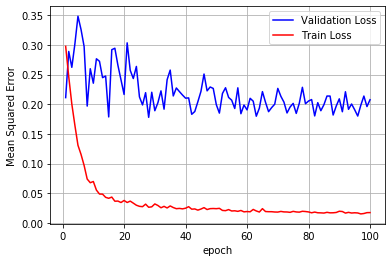

In [19]:
import matplotlib.pyplot as plt

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()
    fig.canvas.draw()
fig,ax = plt.subplots(1,1)


ax.set_xlabel('epoch') ; 
ax.set_ylabel('Mean Squared Error')
x = list(range(1,100+1))

vy = results.history['val_loss']
ty = results.history['loss']
plt_dynamic(x, vy, ty, ax)